In [1]:
import numpy as np
import pandas as pd
import main
fake_data_wc = pd.read_csv('fake_data/fake_wc_res.csv', delimiter=';')
fake_data_wc.head()

,ID,X,Y,WC
0,0,348202,6460000,1.700000e+38
1,1,348202,6460000,1.700000e+38
2,2,348202,6460000,1.700000e+38
3,3,348202,6460000,1.700000e+38
4,4,348202,6460000,1.700000e+38


In [2]:
# Конвертируем форматы
fake_data_wc['WC'] = fake_data_wc['WC'].astype('float64')
fake_data_wc['ID'] = fake_data_wc['ID'].astype('str')
fake_data_wc['WELL_NAME'] = 'fake_' + fake_data_wc['ID']
del fake_data_wc['ID']
fake_data_wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5399 entries, 0 to 5398
Data columns (total 4 columns):
X            5399 non-null int64
Y            5399 non-null int64
WC           5399 non-null float64
WELL_NAME    5399 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 168.8+ KB


In [3]:
fake_data_wc.describe()

,X,Y,WC
count,5399.000000,5.399000e+03,5.399000e+03
mean,353124.948694,6.465675e+06,2.393036e+36
std,2180.726934,4.954670e+03,2.002907e+37
min,348202.000000,6.460000e+06,1.300000e-01
25%,351602.000000,6.460000e+06,2.700000e-01
50%,353302.000000,6.470000e+06,3.200000e-01
75%,354702.000000,6.470000e+06,3.600000e-01
max,357802.000000,6.470000e+06,1.700000e+38


In [5]:
# Удаляем значения зашедшие за край
fake_data_wc = fake_data_wc.drop(fake_data_wc[fake_data_wc['WC'] > 1].index)
fake_data_wc.describe()

,X,Y,WC
count,5323.000000,5.323000e+03,5323.000000
mean,353157.138080,6.465756e+06,0.318732
std,2158.768029,4.942957e+03,0.070173
min,348302.000000,6.460000e+06,0.130000
25%,351602.000000,6.460000e+06,0.270000
50%,353402.000000,6.470000e+06,0.320000
75%,354802.000000,6.470000e+06,0.360000
max,357802.000000,6.470000e+06,0.620000


In [6]:
fake_las_out = pd.read_csv('fake_data/fake_las_out.csv', delimiter=';')
fake_las_out.head()

,WELL_NAME,DEPTH,APS
0,fake_0,2584.999314,0.380130
1,fake_0,2585.121187,0.380130
2,fake_0,2585.121309,0.364062
3,fake_0,2585.243182,0.364062
4,fake_0,2585.243304,0.309785


In [7]:
fake_bottom = pd.read_csv('fake_data/fake_bottom_res.csv', delimiter=';')
fake_bottom['ID'] = fake_bottom['ID'].astype('str')
fake_bottom['WELL_NAME'] = 'fake_' + fake_bottom['ID']
fake_bottom = fake_bottom.rename(columns={'DEPTH': 'DEPTH_BOTTOM'})
del fake_bottom['ID']
del fake_bottom['X']
del fake_bottom['Y']
fake_bottom.head()

,DEPTH_BOTTOM,WELL_NAME
0,2601.50,fake_0
1,2600.09,fake_1
2,2598.85,fake_2
3,2598.79,fake_3
4,2599.31,fake_4


In [8]:
fake_top = pd.read_csv('fake_data/fake_top_res.csv', delimiter=';')
fake_top['ID'] = fake_top['ID'].astype('str')
fake_top['WELL_NAME'] = 'fake_' + fake_top['ID']
fake_top = fake_top.rename(columns={'DEPTH': 'DEPTH_TOP'})
del fake_top['ID']
del fake_top['X']
del fake_top['Y']
fake_top.head()

,DEPTH_TOP,WELL_NAME
0,2585.02,fake_0
1,2582.98,fake_1
2,2581.22,fake_2
3,2580.52,fake_3
4,2580.87,fake_4


In [9]:
fake_data = pd.merge(fake_data_wc, fake_las_out, on='WELL_NAME')
fake_data = pd.merge(fake_data, fake_top, on='WELL_NAME') 
fake_data = pd.merge(fake_data, fake_bottom, on='WELL_NAME')
fake_data.head()

,X,Y,WC,WELL_NAME,DEPTH,APS,DEPTH_TOP,DEPTH_BOTTOM
0,348302,6460000,0.39,fake_24,2588.656453,0.274434,2588.27,2603.89
1,348302,6460000,0.39,fake_24,2588.771455,0.274434,2588.27,2603.89
2,348302,6460000,0.39,fake_24,2588.771570,0.274434,2588.27,2603.89
3,348302,6460000,0.39,fake_24,2588.886333,0.191055,2588.27,2603.89
4,348302,6460000,0.39,fake_24,2588.886448,0.101674,2588.27,2603.89


In [61]:
fake_data.describe()

,X,Y,WC,DEPTH,APS,DEPTH_TOP,DEPTH_BOTTOM
count,1.442262e+06,1.442262e+06,1.442262e+06,1.442262e+06,1.439216e+06,1.442262e+06,1.442262e+06
mean,3.531563e+05,6.465755e+06,3.187148e-01,2.578505e+03,4.293808e-01,2.569081e+03,2.587868e+03
std,2.157829e+03,4.942616e+03,7.016144e-02,1.576198e+01,2.691480e-01,1.498229e+01,1.485952e+01
min,3.483020e+05,6.460000e+06,1.300000e-01,2.532813e+03,-4.832993e-01,2.532840e+03,2.552960e+03
25%,3.516020e+05,6.460000e+06,2.700000e-01,2.567050e+03,2.017095e-01,2.557590e+03,2.576770e+03
50%,3.534020e+05,6.470000e+06,3.200000e-01,2.579268e+03,4.365633e-01,2.570125e+03,2.589245e+03
75%,3.548020e+05,6.470000e+06,3.600000e-01,2.589840e+03,6.482666e-01,2.580060e+03,2.598540e+03
max,3.578020e+05,6.470000e+06,6.200000e-01,2.625431e+03,1.220397e+00,2.610160e+03,2.625540e+03


In [10]:
from scipy import interpolate
well_name_list = fake_data['WELL_NAME'].value_counts().index.tolist()
x_values = []
y_values = []
count_val = 500
well_count = 0
min_count_val_in_data = 10
for well_name in well_name_list:
    if well_count%500 == 0:
        print(well_count, ' of ', len(well_name_list))
    data_well =  fake_data[fake_data['WELL_NAME'] == well_name]
    bottom = data_well['DEPTH_BOTTOM'].tolist()[0]
    top = data_well['DEPTH_TOP'].tolist()[0]
    # print('top = ', top)
    # print('bottom =', bottom)    
    data_well_by_bound = data_well[(data_well['DEPTH'] >= top) & (data_well['DEPTH'] <= bottom)]
    x_arr = data_well_by_bound['DEPTH']
    y_arr = data_well_by_bound['APS']
    
    if (len(x_arr) < min_count_val_in_data):
            continue
    
    # print ('length of array depth', len(x_arr))
    f_spline = interpolate.interp1d(x_arr, y_arr, kind = 'slinear')
    h_start = data_well_by_bound['DEPTH'].min()
    h_end = data_well_by_bound['DEPTH'].max()
    # print(h_start, h_end, top, bottom)
    h_step = (h_end - h_start)/count_val
    x_temp = []
    i = 0
    while(i < count_val):
        x_temp.append(float(f_spline(h_start + i * h_step)))
        i = i + 1
    x_values.append(x_temp)  
    y_values.append(data_well['WC'].tolist()[0])
    well_count = well_count + 1
print('end fill')

0  of  5322
500  of  5322
1000  of  5322
1500  of  5322
2000  of  5322
2500  of  5322
3000  of  5322
3500  of  5322
4000  of  5322
4500  of  5322
5000  of  5322
end fill


In [19]:
x_values = np.array(x_values)
print(x_values.shape)

(5322, 500)


In [65]:
print(np.min(x_values))
print(np.max(x_values))

-0.483299255
1.2203967571


In [20]:
y_values = np.array(y_values)
print(y_values.shape)

(5322,)


In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold
x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values, test_size=0.3, random_state=17)

In [22]:
x_train.shape

(3725, 500)

In [51]:
del model

In [52]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Создаем последовательную модель
model = Sequential()

model.add(Dense(250, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='relu', input_shape=(250,)))
model.add(Dense(49, activation='relu', input_shape=(100,)))
model.add(Dense(1))

# Компилируем модель
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_11 (Dense)             (None, 49)                4949      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 50        
Total params: 155,349
Trainable params: 155,349
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
# Обучаем сеть
model.fit(x_train, y_train, batch_size=10, nb_epoch=50, verbose=1)

Epoch 1/50
 310/3725 [=>............................] - ETA: 1s - loss: 0.0013 - mean_absolute_error: 0.0277   

C:\Users\M1\Anaconda3\lib\site-packages\keras\models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


3725/3725 [==============================] - 1s 334us/step - loss: 0.0012 - mean_absolute_error: 0.0263
Epoch 2/50
3725/3725 [==============================] - 1s 315us/step - loss: 0.0010 - mean_absolute_error: 0.0247
Epoch 3/50
3725/3725 [==============================] - 1s 318us/step - loss: 9.7771e-04 - mean_absolute_error: 0.0239
Epoch 4/50
3725/3725 [==============================] - 1s 318us/step - loss: 0.0011 - mean_absolute_error: 0.0256
Epoch 5/50
3725/3725 [==============================] - 1s 312us/step - loss: 9.0657e-04 - mean_absolute_error: 0.0229
Epoch 6/50
3725/3725 [==============================] - 1s 321us/step - loss: 9.3577e-04 - mean_absolute_error: 0.0232
Epoch 7/50
3725/3725 [==============================] - 1s 325us/step - loss: 9.2903e-04 - mean_absolute_error: 0.0230
Epoch 8/50
3725/3725 [==============================] - 1s 318us/step - loss: 8.9324e-04 - mean_absolute_error: 0.0226
Epoch 9/50
3725/3725 [==============================] - 1s 327us/step -

In [87]:
# Оцениваем качество обучения сети на тестовых данных
mse, mae = model.evaluate(x_hold, y_hold, verbose=0)
print("Средняя абсолютная ошибка на тестовых данных: %.2f " % (mae))
print(mse)

Средняя абсолютная ошибка на тестовых данных: 0.02 
0.00077592154364


In [56]:
y_predict = model.predict(x_hold)
print(y_predict.shape)
print(y_hold.shape)

(1597, 1)
(1597,)


In [75]:
data_well_for_analize = pd.DataFrame({'y_hold':y_hold, 'y_predict':y_predict[:,0]})
data_well_for_analize = data_well_for_analize.sort_values(by=['y_hold'])
data_well_for_analize['x_axis'] = [x for x in range(len(y_hold))]
data_well_for_analize.head()
# data_well_for_analize.to_csv('AllGisParams/result_keras_regres.csv',index=False, sep = ';')

,y_hold,y_predict,x_axis
608,0.13,0.200140,0
1370,0.13,0.166962,1
4,0.14,0.164990,2
79,0.15,0.168592,3
1393,0.15,0.163351,4


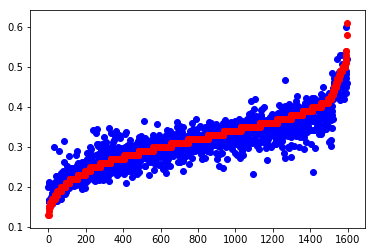

In [99]:
import matplotlib.pyplot as plt
plt.scatter(data_well_for_analize['x_axis'], data_well_for_analize['y_predict'], color = 'blue')
plt.scatter(data_well_for_analize['x_axis'], data_well_for_analize['y_hold'], color = 'red')
plt.show()

In [100]:
# regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

print('MSE                      = '+ str(mean_squared_error(data_well_for_analize['y_hold'], 
                                                            data_well_for_analize['y_predict'])))
print('MAE                      = '+ str(mean_absolute_error(data_well_for_analize['y_hold'], 
                                                             data_well_for_analize['y_predict'])))
print('r2_score                 = '+ str(r2_score(data_well_for_analize['y_hold'], 
                                                  data_well_for_analize['y_predict'])) + '    (best_value is 1)')
print('explained_variance_score = '+ str(explained_variance_score(data_well_for_analize['y_hold'], 
                                                                  data_well_for_analize['y_predict'])) + '    (best_value is 1)')

MSE                      = 0.000775921524845
MAE                      = 0.0200263741263
r2_score                 = 0.841247508849    (best_value is 1)
explained_variance_score = 0.845800961759    (best_value is 1)
